# Importing the Data 

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
dataset = pd.read_csv('Churn.csv')

# Understanding the data

In [3]:
dataset.head() #print the first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.shape #check no. of rows and columns

(7043, 21)

In [5]:
dataset.dtypes #checking datatypes of columns

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
dataset.describe()
#descriptive statistics of columns with numerical data
#SeniorCitizen is categorical, hence gives inappropriate results here

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


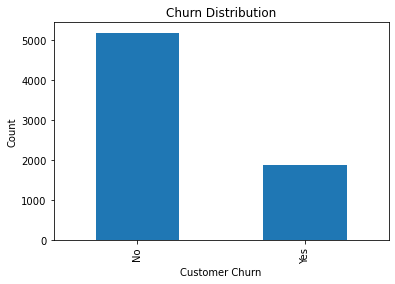

In [7]:
#Understanding the Churn Distribution
dataset['Churn'].value_counts().plot(kind='bar')
plt.xlabel("Customer Churn")
plt.ylabel("Count")
plt.title("Churn Distribution");

In [8]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
100*dataset['Churn'].value_counts()/len(dataset['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

### Dataset is highly imbalanced
### Accuracy is not a good metric to evaluate the classifiers

# Data Cleaning

In [10]:
#good practice to create a copy of the database for data manipulation
datacopy = dataset.copy()


In [11]:
datacopy.info(verbose = True)
#quick summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Missing Values

In [12]:
#checking for missing values
datacopy.isnull().sum()
#we get no missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#TotalCharges should be numeric instead of object, lets convert it and check for missing values again
datacopy.TotalCharges = pd.to_numeric(datacopy.TotalCharges, errors='coerce')
datacopy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

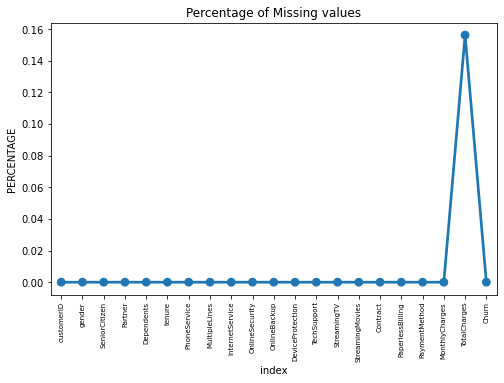

In [14]:
#plotting the % of missing values for every column 
missing = pd.DataFrame((datacopy.isnull().sum())*100/datacopy.shape[0]).reset_index()
plt.figure(figsize=(8,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [15]:
#since the % of missing values for TotalCharges is pretty low (0.15%), we can simply remove these rows.
datacopy.dropna(how = 'any', inplace = True)
datacopy.shape

(7032, 21)

## Outliers

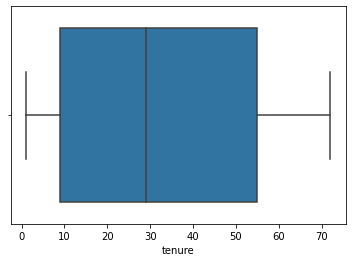

In [16]:
#identifying outliers for tenure, monthly charges and total charges through Boxplots
sns.boxplot(x=datacopy['tenure'])


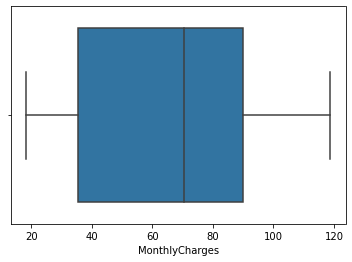

In [17]:
sns.boxplot(x=datacopy['MonthlyCharges'])


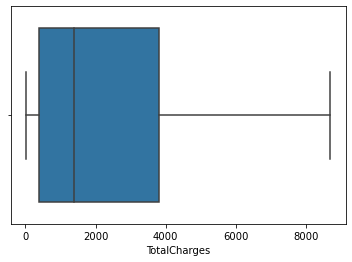

In [18]:
sns.boxplot(x=datacopy['TotalCharges']) 

In [19]:
#Boxplots show that dataset is free of outliers for columns with numerical values
#Lets check again with Z score
from scipy import stats
z = np.abs(stats.zscore(datacopy['tenure']))
print(z)


[1.28024804 0.06430269 1.23950408 ... 0.87280842 1.15801615 1.36810945]


In [20]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [21]:
z = np.abs(stats.zscore(datacopy['MonthlyCharges']))
print(z)

[1.16169394 0.26087792 0.36392329 ... 1.17000405 0.31916782 1.35793167]


In [22]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


In [23]:
z = np.abs(stats.zscore(datacopy['TotalCharges']))
print(z)

[0.99419409 0.17373982 0.95964911 ... 0.85451414 0.87209546 2.01234407]


In [24]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64),)


## Z score test confirms that absence of outliers

### For further Analysis, lets convert all the object datatype columns into numerical datatype

In [25]:
datacopy['Churn'] = np.where(datacopy.Churn == 'Yes',1,0)
#converting target column into numerical datatype (No=0, Yes=1)

In [26]:
datacopy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### For now, tenure seems to be the most important feature
### Lets divide the customers on the basis of a specific range of tenures
### For eg. assign a tenure group for tenure less than 1 year (1-12 months), a second group for tenure between 1 and 2 years (13-24 months) and so on...

In [27]:
# Get the max tenure
print(datacopy['tenure'].max()) #72

72


In [28]:
# Group the tenure in groups of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
datacopy['tenure_group'] = pd.cut(datacopy.tenure, range(1, 80, 12), right=False, labels=labels)

In [29]:
datacopy['tenure_group'].value_counts()


1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [30]:
#drop column customerID and tenure as they are no longer needed for further analysis
datacopy.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
datacopy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [31]:
#converting all other categorical columns to numerical by using dummies
datacopy_dummies = pd.get_dummies(datacopy)
datacopy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [32]:
datacopy_dummies.shape

(7032, 51)

## Multi Collinearity

In [33]:
#checking for numerical features with high correlation
#making another copy for convenience
datacopy1 = dataset.copy()
datacopy1.TotalCharges = pd.to_numeric(datacopy1.TotalCharges, errors='coerce')

In [34]:
num_feats = [x for x in datacopy1.columns if datacopy1[x].dtype != "object"]

In [35]:
num_feats

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

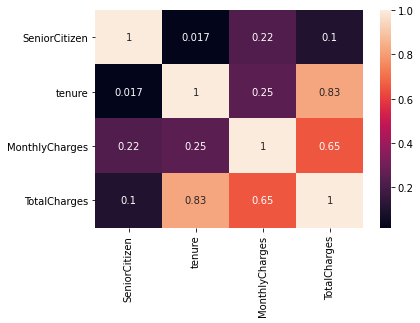

In [36]:
sns.heatmap(datacopy1[num_feats].corr(), annot=True) 

### No 2 numerical features are correlated by more than 0.95.
### Hence we can ignore the small amount of multi collinearity of features.

# Data Visualization

## Univariate Analysis

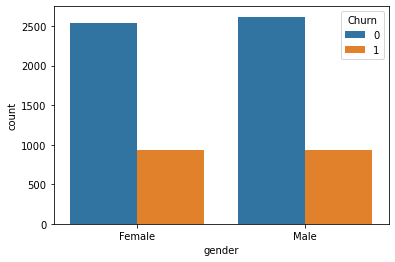

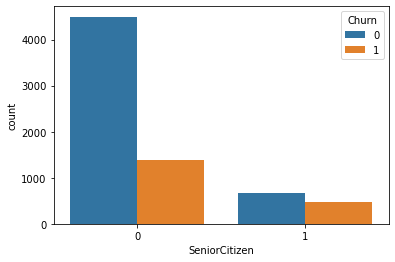

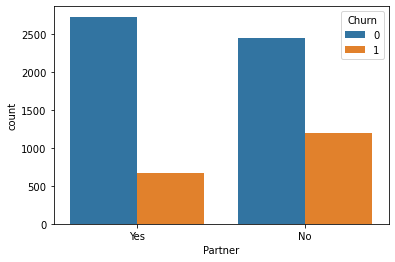

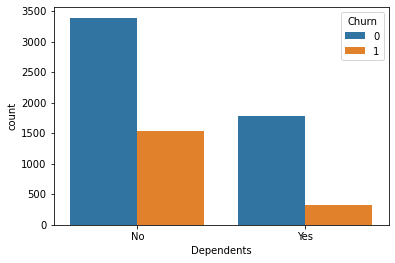

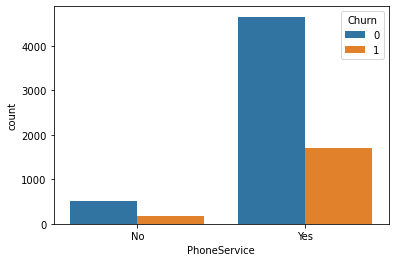

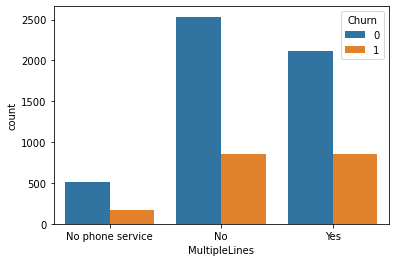

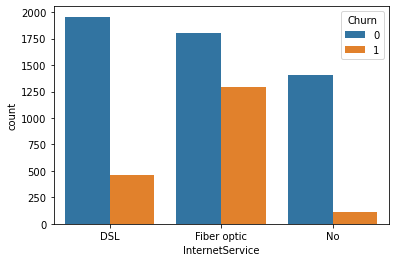

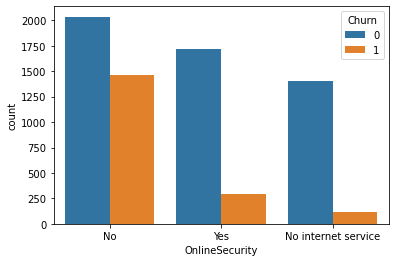

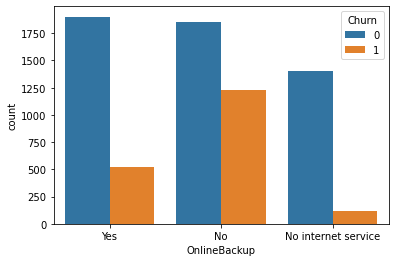

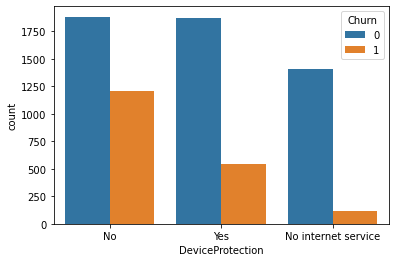

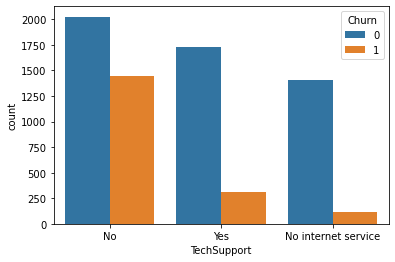

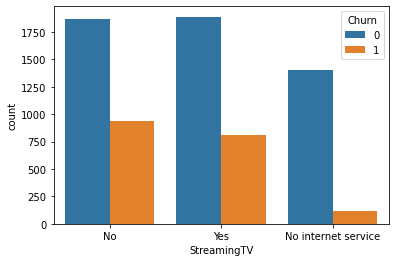

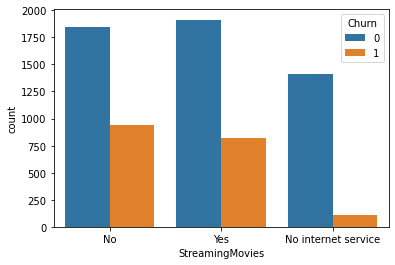

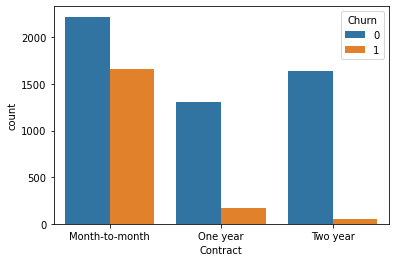

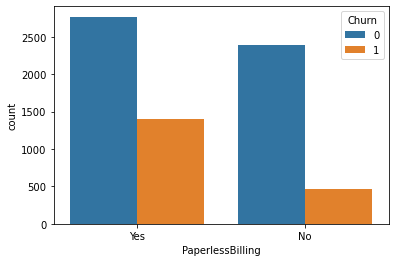

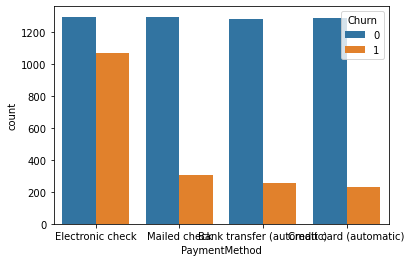

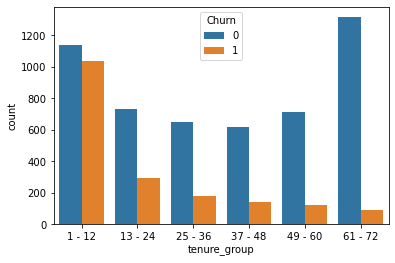

In [37]:
#Plotting distibution of individual predictors by churn
for i, predictor in enumerate(datacopy.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=datacopy, x=predictor, hue='Churn')

### Some Coclusions
### 1. Gender is not an indicator of churn at all
### 2. Senior Citizens have a much higher churn rate as compared to non Senior Citizens
### 3. Customers without partners and dependents have higher churn rate
### 4. Customers with multiple phone lines have higher churn rate
### 5. Customers with No internet have lower churn 
### 6. Customers with Fiber Optic Internet have a significantly higher churn rate as compared to DSL users
### 7. Customers without OnlineSecurity, OnlineBackup, Device Protection and TechSupport are more likely to churn
### 8. Customers with month to month contracts, paperless billing, Electronic Check payment method are more likely to churn
### 9. Customers with with tenure between 1-12 months have significantly high churn rates  
 

## Multivariate Analysis to confirm some of the conclusions

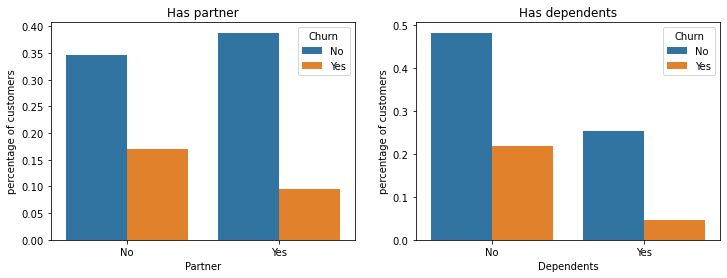

In [38]:
#conclusion 3
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = datacopy1.groupby('Partner')["Churn"].value_counts()/len(datacopy1)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = datacopy1.groupby('Dependents')["Churn"].value_counts()/len(datacopy1)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

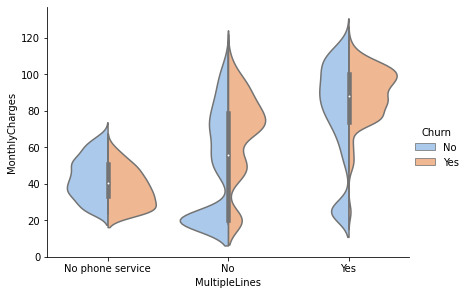

In [39]:
#Conclusion 4, lets see how multiplephone lines affect monthly rates
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=datacopy1, height=4.2, aspect=1.4)
#Multiplephone lines implies higher monthly rates which leads to higher rate of churn

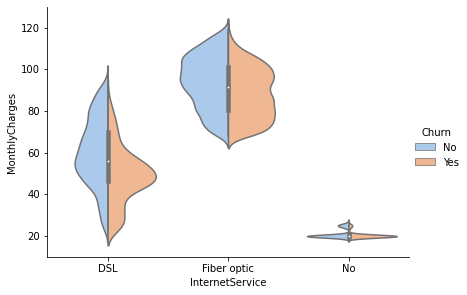

In [40]:
#Conclusion 5 and 6
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=datacopy1, height=4.2, aspect=1.4);
#Better internet implies higher monthly charges which implies higher churn rates

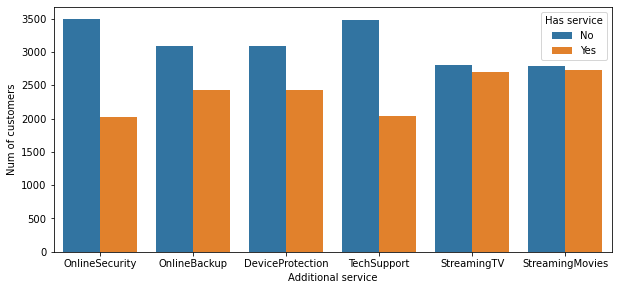

In [41]:
#Conclusion 7 Grouping all the internet related services
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(datacopy1[datacopy1["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

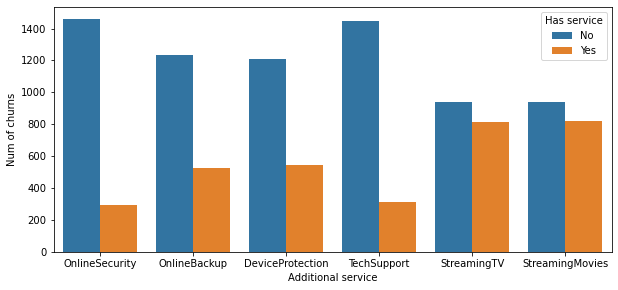

In [42]:
plt.figure(figsize=(10, 4.5))
df1 = datacopy1[(datacopy1.InternetService != "No") & (datacopy1.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()
# Customers without OnlineSecurity, OnlineBackup, Device Protection,and TechSupport are more likely to churn
# Streaming Movies is an inconclusive indicator

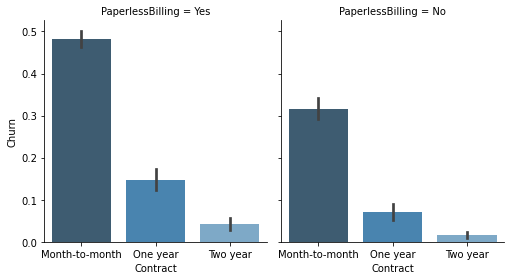

In [43]:
#Conclusion 8 and 9
g = sns.FacetGrid(datacopy, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "Churn", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])


#### One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. Moreover customers with longer customers tend to be more loyal. A time-series dataset would be better to understand this kind of behaviour.  Now let's have a look at the relation with other numerical features:

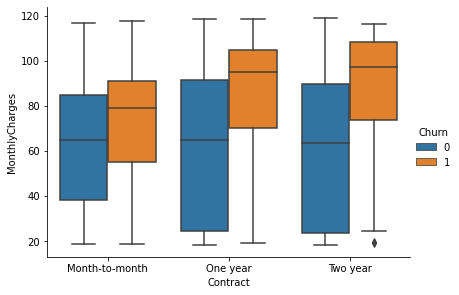

In [44]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=datacopy, height=4.2, aspect=1.4)

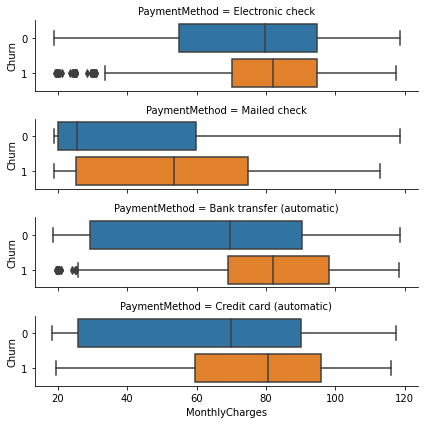

In [45]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=datacopy, height=1.5, aspect=4, orient='h')

#### Customers with Longer Contracts are more affected by monthly charges.
#### There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check.

## Analysis of Churn, Tenure, Monthly Charge and Total Charge 

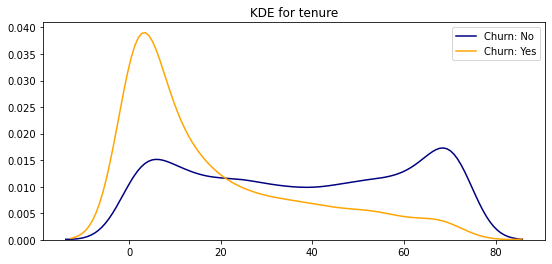

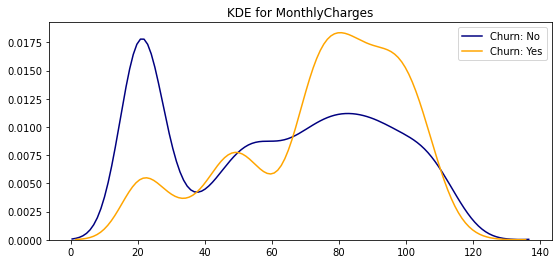

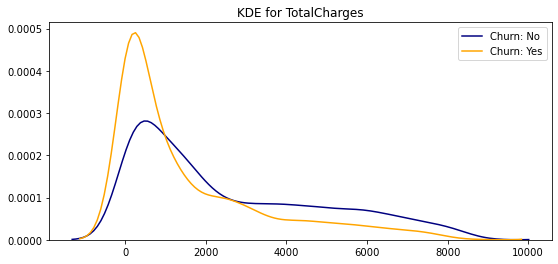

In [46]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(datacopy1[datacopy1['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(datacopy1[datacopy1['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

### Some Conclusions
### 1. Lower Tenure implies Higher churn rate. This means that recent clients are more likely to churn.
### 2. Lower monthly charges imply lower churn rates. Higher monthly charges imply higher churn rate.
### 3. All 3 are very important features due to the distinct shape of the churn and non churn curves.
### 4. Surprisingly, there is a higher churn probability at lower total charges.

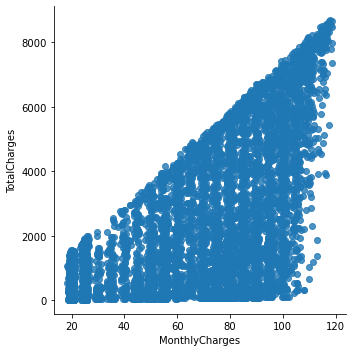

In [47]:
sns.lmplot(data=datacopy_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
#confirming that total charges increase as monthly charges increase

## Correlations with Churn

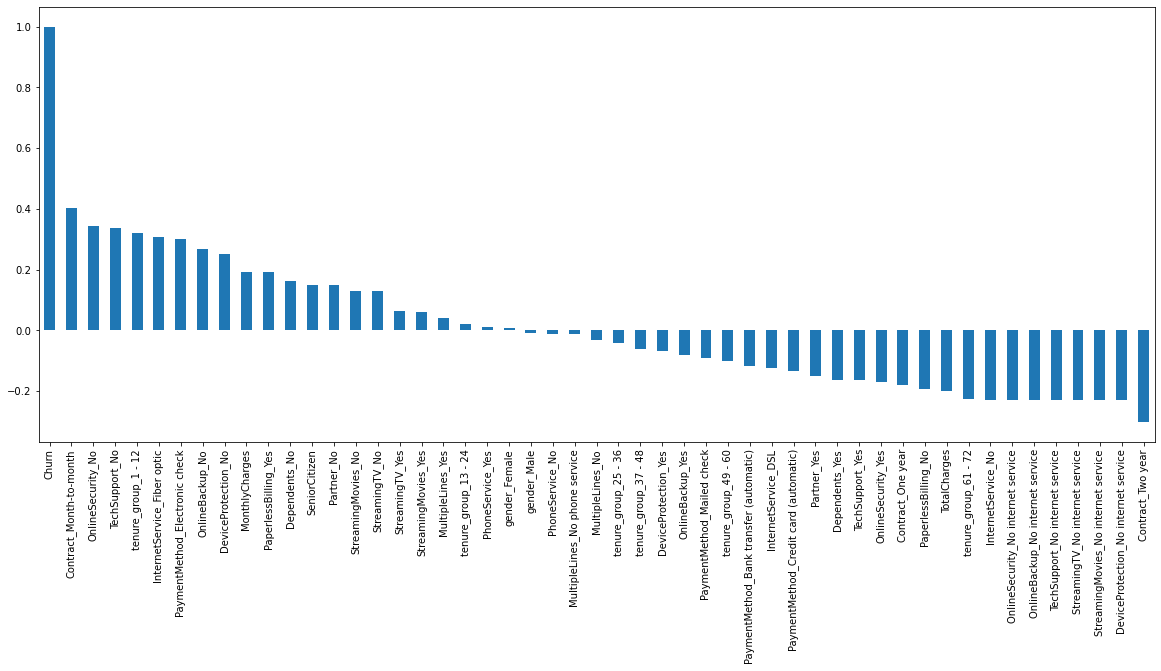

In [48]:
plt.figure(figsize=(20,8))
datacopy_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

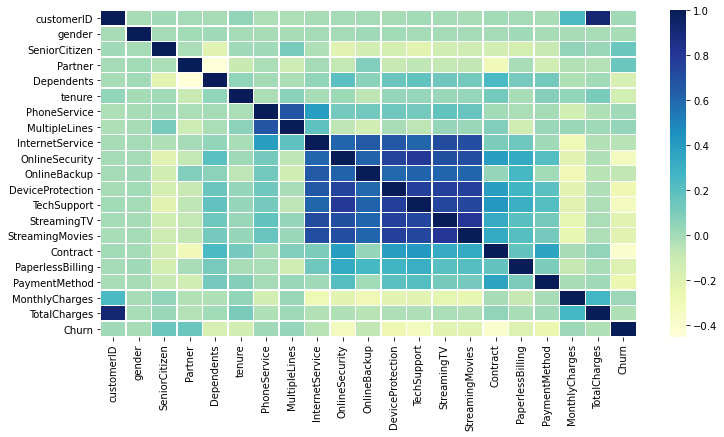

In [49]:
plt.figure(figsize=(12, 6))
corr = datacopy1.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

### Some Conclusions
### Higher Churn rates seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet
### Lower Churn rates is seens in case of Long term contracts, Subscriptions without internet service and in customers engaged for 5+ years
### Factors like Gender, Availability of PhoneService and # of multiple lines have alomost no impact on Churn rates

## Feature Importance using RandomForest Classifier 

In [50]:
#implement feature importance on the original dataset to confirm our conclusions
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('Churn.csv')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dropna(how = 'any', inplace = True)

In [51]:
df.shape

(7032, 21)

In [52]:
df.drop(columns= ['customerID'], axis=1, inplace=True)
df.shape


(7032, 20)

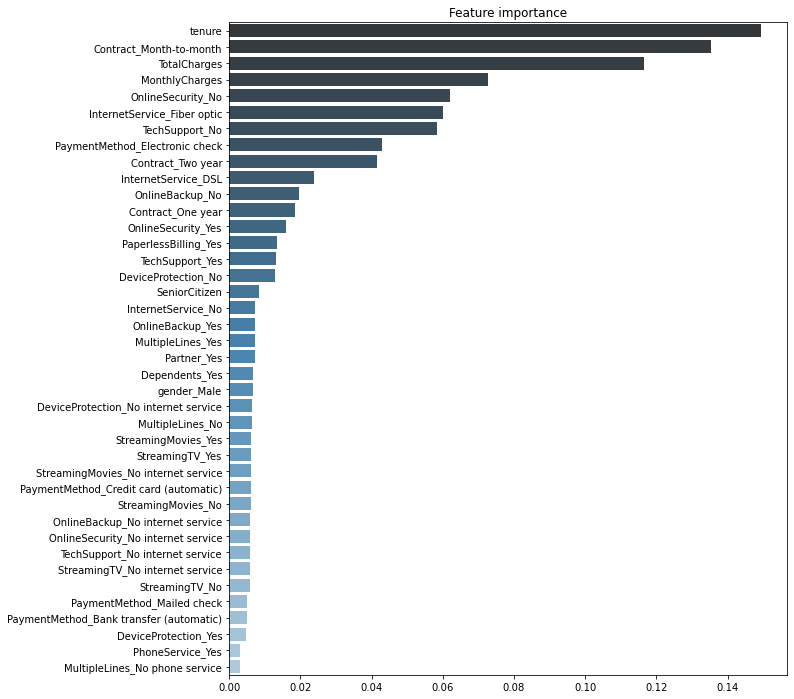

In [53]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

### Feature Importance confirms that Tenure is the most important feature as per our assumption.

# Machine Learning Models

In [54]:
#starting fresh, taking care of some preliminaries
datacopy_dummies.to_csv('tel_churn.csv')
#changing name of dummy file

In [55]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [56]:
df=df.drop('Unnamed: 0',axis=1)


In [57]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [58]:
y=df['Churn']
y


0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [59]:
#importing some models
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

### Training Testing Split
### Ideally, Cross validation should be applied to find the ideal train test split size
### However, as mentioned in the question, training size is about 4000 samples (about 0.57).
### This implies we can take test size roughly to be 0.4 (instead of 0.43) to keep the numbers even.

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)


## 1. Decision Tree Classifier

In [61]:
model_dt=DecisionTreeClassifier(random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [62]:
y_pred=model_dt.predict(x_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
model_dt.score(x_test,y_test)


0.7906150017774618

In [64]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2053
           1       0.65      0.50      0.56       760

    accuracy                           0.79      2813
   macro avg       0.74      0.70      0.71      2813
weighted avg       0.78      0.79      0.78      2813



Text(0.5, 1.0, 'CONFUSION MATRIX')

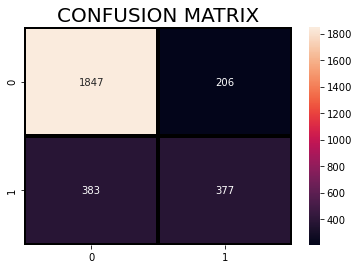

In [65]:
 
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### Since the dataset is highly imbalanced, accuracy is not that important.
### Between precision and recall, higher priority should be given to recall score because of the higher cost associated with false negatives i.e. customers who are churning but being classified as non churn. The company will lose these customers and bear heavier losses. For precision, customers that are falsely identified as churners may result in some loss for the company but its impact is nowhere close to the impact of false negatives.
### In this model, we get pretty bad recall and precision scores for churners. We also get a decent number of false negatives(348) and comparatively few no of true positives(382). Lets try some other models.

## 2. Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=1000, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, n_estimators=1000,
                       random_state=100)

In [67]:
y_pred=model_rf.predict(x_test)
model_rf.score(x_test,y_test)


0.8158549591183789

In [68]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2053
           1       0.73      0.50      0.60       760

    accuracy                           0.82      2813
   macro avg       0.78      0.72      0.74      2813
weighted avg       0.81      0.82      0.80      2813



Text(0.5, 1.0, 'CONFUSION MATRIX')

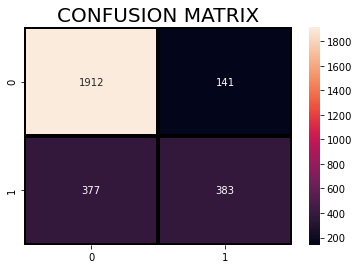

In [69]:
 
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### once again we get bad recall and precision scores for churners. there are a decent no of false negatives and less than ideal true positives. Not much of an improvement from Decision Tree. Lets move on to other models.

## 3. Logistic Regression Model

In [85]:
from sklearn.linear_model import LogisticRegression


In [86]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [87]:
y_pred = model_lr.predict(x_test)


In [88]:
model_lr.score(x_test,y_test)


0.8119445431923213

In [89]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      2053
           1       0.70      0.52      0.60       760

    accuracy                           0.81      2813
   macro avg       0.77      0.72      0.74      2813
weighted avg       0.80      0.81      0.80      2813



Text(0.5, 1.0, 'CONFUSION MATRIX')

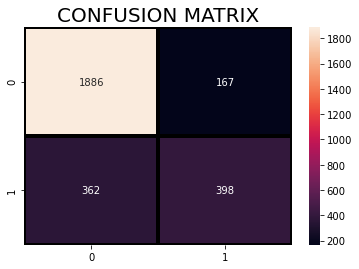

In [90]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### it's the same overall results once again. bad precision and recall rates for churners. lets try more models.

## 4. Support Vector Classifier

In [91]:
from sklearn.svm import SVC
model_sv = SVC(C=1000)

In [92]:
model_sv.fit(x_train, y_train)

SVC(C=1000)

In [93]:
y_pred = model_sv.predict(x_test)
model_sv.score(x_test,y_test)


0.7966583718450053

In [94]:
print(classification_report(y_test, y_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.81      0.95      0.87      2053
           1       0.73      0.39      0.51       760

    accuracy                           0.80      2813
   macro avg       0.77      0.67      0.69      2813
weighted avg       0.79      0.80      0.77      2813



Text(0.5, 1.0, 'CONFUSION MATRIX')

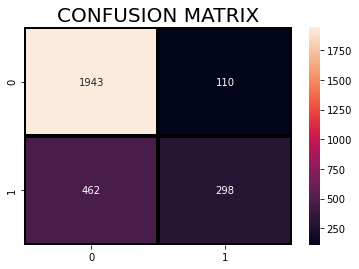

In [95]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### We have found our worst model yet. Definitely not  ideal with such low precision and recall scores.

### The reason for such bad recall and precision scores for churners is that churners are the minority class by a ratio of 27:73. Hence, we need to perform upsampling. Lets use imblearn'S SMOTEENN which combines SMOTE oversampling and undersampling with ENN's cleaning.

## SMOTEENN for Upsampling


In [96]:
from imblearn.combine import SMOTEENN


In [97]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [98]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.4)


## Now, Lets Try the Machine Learning Models Again

## 1. Decision Tree

In [112]:
model_dt2=DecisionTreeClassifier(random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt2.fit(xr_train,yr_train)


DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [113]:
yr_pred=model_dt2.predict(xr_test)
yr_pred


array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [114]:
model_dt2.score(xr_test,yr_test)


0.9334463755828741

In [115]:
print(classification_report(yr_test, yr_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1042
           1       0.93      0.95      0.94      1317

    accuracy                           0.93      2359
   macro avg       0.93      0.93      0.93      2359
weighted avg       0.93      0.93      0.93      2359



Text(0.5, 1.0, 'CONFUSION MATRIX')

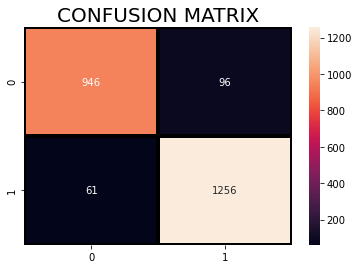

In [116]:
 
sns.heatmap(confusion_matrix(yr_test, yr_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### Considerable improvement in precision and recall for churners. Recall score of 0.95 for churners. We are starting to get incredibly accurate metrics. Lets Keep going.

## 2. Random Forest

In [117]:
model_rf2=RandomForestClassifier(n_estimators=1000, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf2.fit(xr_train,yr_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, n_estimators=1000,
                       random_state=100)

In [118]:
yr_pred=model_rf2.predict(xr_test)
model_rf2.score(xr_test,yr_test)


0.930479016532429

In [119]:
print(classification_report(yr_test, yr_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1042
           1       0.92      0.96      0.94      1317

    accuracy                           0.93      2359
   macro avg       0.93      0.93      0.93      2359
weighted avg       0.93      0.93      0.93      2359



Text(0.5, 1.0, 'CONFUSION MATRIX')

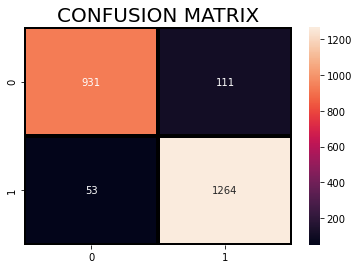

In [120]:
 
sns.heatmap(confusion_matrix(yr_test, yr_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### Extremely high recall score of 0.96 obtained with high precision score.

## 3. Logistic Regression

In [121]:
model_lr2 = LogisticRegression(max_iter=1000)
model_lr2.fit(xr_train, yr_train)

LogisticRegression(max_iter=1000)

In [122]:
yr_pred = model_lr2.predict(xr_test)


In [123]:
model_lr2.score(xr_test,yr_test)


0.9283594743535396

In [124]:
print(classification_report(yr_test, yr_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1042
           1       0.94      0.93      0.94      1317

    accuracy                           0.93      2359
   macro avg       0.93      0.93      0.93      2359
weighted avg       0.93      0.93      0.93      2359



Text(0.5, 1.0, 'CONFUSION MATRIX')

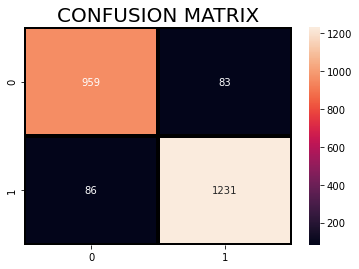

In [125]:
 
sns.heatmap(confusion_matrix(yr_test, yr_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### Recall score = 0.93 for churners.

## 4. Support Vector

In [126]:
model_sv2 = SVC(C=1000)

In [127]:
model_sv2.fit(xr_train, yr_train)

SVC(C=1000)

In [128]:
yr_pred = model_sv2.predict(xr_test)
model_sv2.score(xr_test,yr_test)


0.8885120813904197

In [129]:
print(classification_report(yr_test, yr_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1042
           1       0.88      0.92      0.90      1317

    accuracy                           0.89      2359
   macro avg       0.89      0.88      0.89      2359
weighted avg       0.89      0.89      0.89      2359



Text(0.5, 1.0, 'CONFUSION MATRIX')

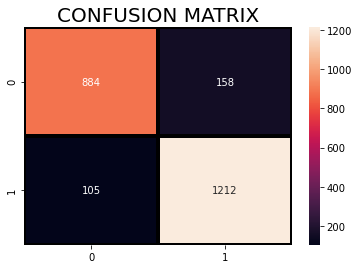

In [130]:
 
sns.heatmap(confusion_matrix(yr_test, yr_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### Recall score = 0.92 for churners.

### Lets try 1 final model for upsampled data.

## 5. KNN Classifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10)

In [133]:
model_knn.fit(xr_train, yr_train)

KNeighborsClassifier(n_neighbors=10)

In [134]:
yr_pred = model_knn.predict(xr_test)
model_knn.score(xr_test,yr_test)


0.9186095803306485

In [135]:
print(classification_report(yr_test, yr_pred, labels=[0,1]))


              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1042
           1       0.92      0.93      0.93      1317

    accuracy                           0.92      2359
   macro avg       0.92      0.92      0.92      2359
weighted avg       0.92      0.92      0.92      2359



Text(0.5, 1.0, 'CONFUSION MATRIX')

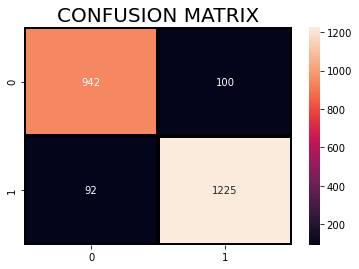

In [136]:
 
sns.heatmap(confusion_matrix(yr_test, yr_pred),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

### Recall score = 0.93 for churners.

# Final Conclusions
## Giving highest priority to Recall score (because of the high false negative impact/associated cost), we conclude that the best model is Random Forest Classifier with upsampled data using SMOTEENN with a Recall score of 0.96 and reasonably high Precision score of 0.92. Because of the biased minority of churners, upsampling of data is a must to get accurate results.


## Based on our exploratory data analysis and implementation of ML models, we can provide some useful strategies for minimizing customer churn, retaining specific customers and seeking out new customers for maximizing profits. They are as follows:

### 1. An evolving cost model can be used to prolong tenure. Customers with higher tenure are less likely to churn. Hence, we can start of with lower monthly charges and increase the prices as the tenure increases.
### 2. Provide better customer service to Senior Citizens as they are more likely churners. More emphasis should be put in retaining Senior Citizens which can be simply achieved by developing an attitude of politeness and kindness when serving them.
### 3. Emphasize the benefits and intrinsic value of the additional internet services provided such as Online Security, Online Backup, Tech Support and Device Protection as customers without these services are more likely to churn. This can be done by targetted advertising highlighting these services.
### 4. When it comes to seeking new customers, target customers with no internet or DSL internet and customers without partners and dependents. This will consideraly lower churn rates.
### 5. Focus more on retaining customers engaged in month to month contracts. Also, keep in mind that Customers with Longer Contracts are more affected by monthly charges, hence are likely to churn if there is a sudden increase in monthly pricing. Hence, the evolving cost model must be balanced and acceptable to customers with longer contracts and longer tenures.
### 6. Finally, Customers involved in paperless billing are more likely to churn. So, the company can try to improve their billing experience and make the online payment systems convenient for them so that they can see it as an added bonus.

### Assuming these strategies have been implemented, the best way to verify that they are working efficiently is to once again perform exploratory data analysis on the newly collected data and compare the results with the results of the previous business model. Pragmatic comparison based on empiric values is the surest way of ensuring that we get the facts. 